В этом домашнем задании мы работаем с набором данных о уровне счастья в странах за 2019 год. Он доступен в репозитории или можно скачать с Kaggle [соревнования](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv).

Все импорты помещаем сверху, под этой клеткой.

In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

%matplotlib inline

1.Считайте данные с помощью pandas в переменную `df`.

In [2]:
DATA = Path('../data/')
df = pd.read_csv(DATA / '2019.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


2.Выведите диаграмму рассеянья признаков 'Score' и 'GDP per capita' используя regplot в seaborn.

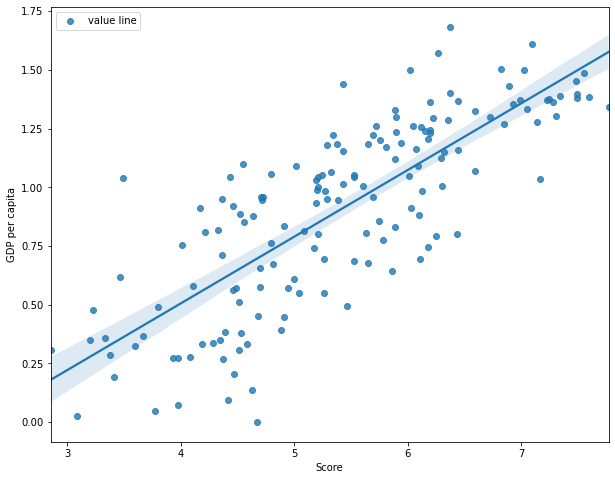

In [3]:
score = df['Score']
gdp_cap = df['GDP per capita']
plt.figure(figsize=(10,8))
sns.regplot(x=score, y=gdp_cap, label='value line');
plt.legend(loc=2);

Мы будем моделировать эту зависимость. Кажется, что она должна хорошо описываться линейной моделью.

## Решение задачи линейной регрессии методом градиентного спуска

3.Реализуйте формулу предсказания линейной регрессии в фукнции predict. Фукнция возвращает предсказание. Предскахание строится как матрица признаков умноженная на веса. 

In [4]:
def predict(X, theta):
    prdiction = X.dot(theta)
    return prdiction

4.Дополните функцию затрат, формула которой приведена в слайдах лекции о Линейной регрессии (подсказка - формула такая же, как если бы мы считали mean squared error).   
Функция cost принимает вектор параметров theta, матрицу наших признаков X и реальные значения  целевой переменной y.


In [5]:
def cost(theta, X, y):
    m = len(y)
    predictions = predict(X, theta)
    cost = np.power(predictions - y, 2).sum() / m
    return cost

5.Дополните функции get_gradient и gradient_descent, которые позволят реализовать  алгоритм градиетного спуска. Заполните все места, где стоят троеточия. Используйте реализованные в предыдущих заданиях функции cost и predict.
Для поиска theta - используйте формулу обновления параметров со слайдов лекции о Линейной регресии.

In [6]:
def get_gradient(w, x, y):
    y_estimate = predict(x, w)
    error = y - y_estimate
    gradient = -(1.0/len(x)) * error.T.dot(x)
    mean_squared_error = cost(w, x, y)
    return gradient, mean_squared_error

In [7]:
def gradient_descent(X, y, theta, learning_rate, n_iterations, eps):
    cost_history = []
    theta_history = []
    iterations = 1
    while True:
        gradient, error = get_gradient(theta, X, y)
        cost_history.append(error)
        new_theta = theta - learning_rate*gradient.T
        theta_history.append(new_theta)
        # Условие остановки
        if np.sum(abs(theta - new_theta)) < eps:
            print( "Алгоритм сошёлся.")
            break
        #добавил еще одно условие остановки, т.к. изначальный вариант передачи параметра iterations был бессмысленным
        elif iterations == n_iterations:
            print(f"Выполнено {iterations} итераций")
            break

        # Print error every 100 iterations
        if iterations % 100 == 0:
            print ("Итерация: %d - Ошибка на трейн данных: %.4f" %(iterations, error))

        iterations += 1
        theta = new_theta
    return theta, cost_history, theta_history, iterations

Подготовим данные.

In [168]:
X = df['GDP per capita'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

6.Разделите X и y на train и test подвыборки в соотношении 80/20. Поскольку у нас мало данных, validation выборку выделять не будем. Запишите результаты в X_train_df, y_train, X_test_df, y_test.

In [169]:
test_size = 0.2
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size = test_size, shuffle = True, random_state = 42)

7.Реализуйте масштабирование признаков с использованием MinMaxScaler. Помните о том, как мы примеяем масштабирование признаков на train и test выборках.

In [170]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))
min_max_scaler.fit(X_train_df)

X_train_scaled = min_max_scaler.transform(X_train_df)
X_test_scaled = min_max_scaler.transform(X_test_df)

8.Добавьте колонку из единичек для X_train_df, X_test_df.

In [171]:
X_train_scaled_ones = np.hstack((np.ones_like(X_train_scaled), X_train_scaled))
X_test_scaled_ones = np.hstack((np.ones_like(X_test_scaled), X_test_scaled))

9.Установите learning rate равный 0.01, количество итераций 1000 и запустите градиентный спуск на тренировочных данных, передав все необходимые параметры.

In [12]:
theta = np.random.randn(2,1)
learning_rate = 0.01
n_iterations = 1000
eps=1e-5

theta, cost_history, theta_history, iterations = gradient_descent(X_train_scaled_ones, y_train, theta, 
                                                                  learning_rate, n_iterations, eps)

Итерация: 100 - Ошибка на трейн данных: 2.3063
Итерация: 200 - Ошибка на трейн данных: 0.6877
Итерация: 300 - Ошибка на трейн данных: 0.5590
Итерация: 400 - Ошибка на трейн данных: 0.5406
Итерация: 500 - Ошибка на трейн данных: 0.5312
Итерация: 600 - Ошибка на трейн данных: 0.5231
Итерация: 700 - Ошибка на трейн данных: 0.5158
Итерация: 800 - Ошибка на трейн данных: 0.5092
Итерация: 900 - Ошибка на трейн данных: 0.5032
Выполнено 1000 итераций


10.Отобразите на линейном графике cost_history. Используйте любую библиотеку для визуализации.

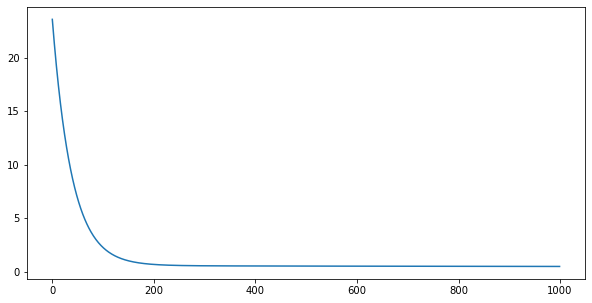

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data=cost_history);

Отобразите только первые 200 итераций. Похоже, после них модель мало обучается. Мы могли бы применить технику early stopping в данном случае и остановиться на некотором небольшом количестве итераций. Обычно эта техника применяется, чтоб збежать переобучения. При этом теряется немного точности на train set.

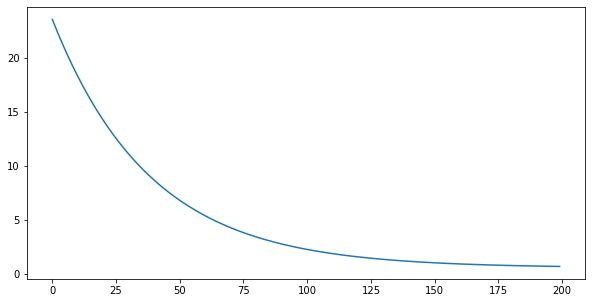

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(data=cost_history[:200]);

Выведем полученные параметры и последнее значение функции затрат.

In [15]:
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f},'.format(theta[0][-1],theta[1][-1]))
print('Final cost/MSE:  {:0.3f}.'.format(cost_history[-1]))

Theta0:          3.953,
Theta1:          2.757,
Final cost/MSE:  0.498.


11.Реализуйте mean_squared_error согласно формуле в лекции (функция очень похожа на cost_function, немного дургие входящие переменные).

In [16]:
def my_mean_squared_error(y_true, y_predicted):
    error =  np.power(y_predicted - y_true, 2).sum() / len(y_true)
    return error

12.Найдите прогнозы на X_train_df, X_test_df и посчитайте ошибку прогнозов на обеих подвыборках.

In [17]:
train_predict = predict(X_train_scaled_ones, theta)
print(f"Ошибка на выборке X_train_df: {my_mean_squared_error(y_train, train_predict)}")

test_predict = predict(X_test_scaled_ones, theta)
print(f"Ошибка на выборке X_test_df: {my_mean_squared_error(y_test, test_predict)}")

Ошибка на выборке X_train_df: 0.4976486128791683
Ошибка на выборке X_test_df: 0.5541278038029427


13.Выведите диаграмму рассеянья признаков 'Score' и 'GDP per capita' и добавьте линию прогноза модели

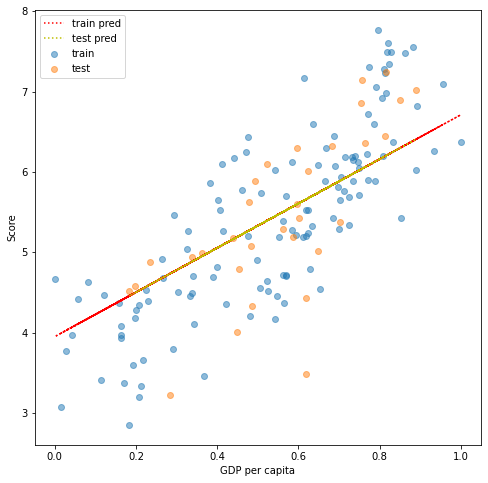

In [18]:
#интерсепт должен бы быть чуть пониже, но на 1000 итерациях модель немного недообучается
plt.figure(figsize=(8,8))
plt.scatter(X_train_scaled, y_train, label='train', alpha=0.5);
plt.plot(X_train_scaled, train_predict, label='train pred', color='r', linestyle='dotted');
plt.scatter(X_test_scaled, y_test, label='test', alpha=0.5);
plt.plot(X_test_scaled, test_predict, label='test pred', color='y', linestyle='dotted');

plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.legend();

14.Обучите линейную регрессию на тех же данных используя LinearRegression из sklearn. Внимание, в sklearn модель мы подаём данные в формате датафрейма.

In [19]:
X_train_lr = pd.DataFrame(X_train_df)
X_test_lr = pd.DataFrame(X_test_df)

lr = LinearRegression()
lr.fit(X_train_lr, y_train)

LinearRegression()

Сравните ошибку на тестовой выборке линейной регрессии, написанной вами, и из sklearn. Есть ли разница в значениях?

In [21]:
lr_train_predict = lr.predict(X_train_lr)
lr_test_predict = lr.predict(X_test_lr)

lr_train_mse = mean_squared_error(y_train, lr_train_predict)
lr_test_mse = mean_squared_error(y_test, lr_test_predict)

mse_train = my_mean_squared_error(y_train, train_predict)
mse_test = my_mean_squared_error(y_test, test_predict)

print(f"Тренировочная выборка:\n   Самописная функция: {mse_train},\n   Sklearn: {lr_train_mse}.\n")
print(f"Тестовая выборка:\n   Самописная функция: {mse_test},\n   Sklearn: {lr_test_mse}.")

Тренировочная выборка:
   Самописная функция: 0.4976486128791683,
   Sklearn: 0.4417211923118578.

Тестовая выборка:
   Самописная функция: 0.5541278038029427,
   Sklearn: 0.5079112698997723.


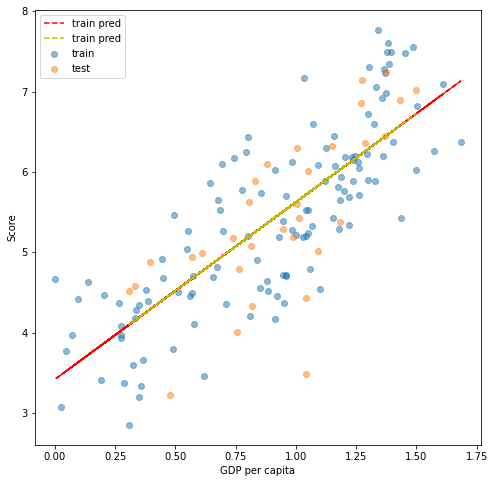

In [51]:
#выводим для сравнения график рассеяния и линию предсказания на оснвоании прогноза sklearn
plt.figure(figsize=(8,8))
plt.scatter(X_train_lr, y_train, label='train', alpha=0.5);
plt.plot(X_train_lr[0], lr_train_predict, label='train pred', color='r', linestyle='dashed');
plt.scatter(X_test_lr, y_test, label='test', alpha=0.5);
plt.plot(X_test_lr[0], lr_test_predict, label='train pred', color='y', linestyle='dashed');

plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.legend();

15.Давайте обучим линейную регрессию на всех данных и посмотрим, стало ли лучше.

15.1.Обучите линейную регрессию из sklearn с помощью используя в качестве набора фичей 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'

Не забудьте:  
    1. Разделить на train и test.  
    2. Нормировать каждую колонку данных.  

In [185]:
#функция для получения индексов для выборок тест и трейн
def get_subsets(X):
    train_id, test_id = train_test_split(X.index, test_size=test_size, shuffle=True, random_state=42)
    return train_id, test_id

In [186]:
#формируем новый data frame
features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 
            'Generosity', 'Perceptions of corruption']
X_1 = df[features]
y_1 = df['Score']

In [187]:
#получаем индексы для тест и трейн выборок
test_size = 0.2
train_id, test_id = get_subsets(X_1)

In [188]:
#скейлим данные
min_max_scaler_1 = MinMaxScaler(feature_range=(0, 1))
min_max_scaler_1.fit(X_1.loc[train_id])
min_max_scaled = min_max_scaler_1.transform(X_1)
min_max_scaled_df = pd.DataFrame(min_max_scaled, columns=X_1.columns)

In [189]:
#обучаем модель
lr_1 = LinearRegression()
lr_1.fit(min_max_scaled_df.loc[train_id], y_1.loc[train_id])

LinearRegression()

In [190]:
#получаем прогноз по тестовым и тренировочным выборкам
y_train_predict = lr_1.predict(min_max_scaled_df.loc[train_id])
y_test_predict = lr_1.predict(min_max_scaled_df.loc[test_id])

15.2.Выведите ошибку прогноза на train и test выборках. Сравните с результатом, полученным при обучении на одном признаке. Изменились ли метрики?

In [191]:
mse_train_1 = mean_squared_error(y_1.loc[train_id], y_train_predict)
mse_test_1 = mean_squared_error(y_1.loc[test_id], y_test_predict)

print(f"Ошибка на:\n   -тренировочной выборке по одному признаку: {lr_train_mse};") 
print(f"   -тренировочной выборке по 6ти признакам: {mse_train_1};") 
print(f"   -тестовой выборке по одному признаку: {lr_test_mse};") 
print(f"   -тестовой выборке по 6ти признакам: {mse_test_1}.")

Ошибка на:
   -тренировочной выборке по одному признаку: 0.4417211923118578;
   -тренировочной выборке по 6ти признакам: 0.23646992155921964;
   -тестовой выборке по одному признаку: 0.5079112698997723;
   -тестовой выборке по 6ти признакам: 0.4144641383528352.


15.3.Выведите коэффициенты модели и определите, какие признаки имеют стоящие перед ними наибольшие коэффициенты по модулю (достаточно вывести названия признаков и коэффициенты в одном датафрейме).

In [192]:
pd.DataFrame(data=lr_1.coef_, index=X_1.columns, columns=['Thetas']).sort_values('Thetas', ascending=False)

,Thetas
Social support,2.001295
GDP per capita,1.264207
Healthy life expectancy,1.062208
Freedom to make life choices,0.940072
Perceptions of corruption,0.503931
Generosity,0.153034


16.Обучите модель полиномиальной регрессии со степенью 2 на тех же данных, что и в предыдущем пункте. Используйте в процессе обучения PolynomialFeatures. Исследуйте метрики качества на трейн и тест датасетах. Есть ли оверфит?

In [193]:
#функция получения качества метрик модели
def get_metrics(y_true, y_predicted):
    params = dict(y_true=y_true, y_pred=y_predicted)
    mse = mean_squared_error(**params)
    r2 = r2_score(**params)
    return dict(mse=mse, r2=r2)

In [194]:
#функция обучения
def poly_reg(X, y, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X.loc[train_id])
    X_test_poly = polynomial_features.fit_transform(X.loc[test_id])

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y.loc[train_id])
    
    poly_train_predict = poly_model.predict(X_train_poly)
    poly_test_predict = poly_model.predict(X_test_poly)
    
    return poly_train_predict, poly_test_predict, poly_model  

In [195]:
degree = 2
poly_train_predict, poly_test_predict, poly_model = poly_reg(min_max_scaled_df, y_1, degree)

In [196]:
#выводим метрики качества
#оверфит при степени 2 отсутсвует
print(f"Train subset: {get_metrics(y_1.loc[train_id], poly_train_predict)}")
print(f"Test subset: {get_metrics(y_1.loc[test_id], poly_test_predict)}")

Train subset: {'mse': 0.3548564246786794, 'r2': 0.7226514915643878}
Test subset: {'mse': 0.5161164057617187, 'r2': 0.5040791643968614}


17.Сделайте пайплайн с шагами MinMaxScaler, PolynomialFeatures и ElasticNet. Проведите поиск оптимальных гиперпараметров на тренировочном наборе данных используя GridSearchCV, метрика качества.   
Какие риперпараметры искать выберите на своё усмотрение, к примеру, это могут быть параметры регуляризации ElasticNet или количество степеней в PolynomialFeatures.  
Выведите значения найденнях оптимальных гиперпараметров.  
Лучшую модель из кросс валидации оцените на тестовом наборе данных.  


Какая модель в домашнем задании дала лучшие значения Mean Squared Error на тестовых данных, лин. регрессия написанная самостоятельно, лин. регрессия из sklearn, полиномиальная регрессия со степенями фичей 2, модель найденная в результате поиска гиперпараметров?  

In [217]:
pipeline = Pipeline([
                    ('scaler', MinMaxScaler()),
                    ('polynomial_features', PolynomialFeatures()),
                    ('model', ElasticNet())
])

In [223]:
param_grid = {
    'polynomial_features__degree': np.arange(2,5,1),
    'model__alpha': np.arange(0.0001,0.8,0.1),
    'model__l1_ratio': np.arange(0.1,1,0.2),
    'model__fit_intercept': [True, False]
}

search = GridSearchCV(pipeline,
                      param_grid,
                      cv = 5,
                      scoring="neg_mean_squared_error",
                      verbose=0
                     )

In [224]:
search.fit(X_1.loc[train_id], y_1.loc[train_id])

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.406804751023673, tolerance: 0.013437523262626264
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.519635546349082, tolerance: 0.012134407200000003
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.340650703740498, tolerance: 0.01324279734141414
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9292014315741297, tolerance: 0.012654043896
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.67780570112242, tolerance: 0.013437523262626264
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.314850824368868, tolerance: 0.012134407200000003
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.366208658275592, tolerance: 0.011968970563636364
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8607708660278397, tolerance: 0.012654043896
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.369691965766419, tolerance: 0.013437523262626264
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.588549030449308, tolerance: 0.3000226676
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.7214450417124825, tolerance: 0.2971643742
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.37479384445011, tolerance: 0.3077767794
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did no

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.588069104970777, tolerance: 0.3000226676
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.768098032121519, tolerance: 0.2971643742
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.704353014176659, tolerance: 0.3077767794
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did no

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.026245984840381, tolerance: 0.3006402347
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.779232523190986, tolerance: 0.3000226676
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.374531288195881, tolerance: 0.2971643742
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did no

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('model', ElasticNet())]),
             param_grid={'model__alpha': array([1.000e-04, 1.001e-01, 2.001e-01, 3.001e-01, 4.001e-01, 5.001e-01,
       6.001e-01, 7.001e-01]),
                         'model__fit_intercept': [True, False],
                         'model__l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'polynomial_features__degree': array([2, 3, 4])},
             scoring='neg_mean_squared_error')

In [225]:
search.best_params_

{'model__alpha': 0.10010000000000001,
 'model__fit_intercept': True,
 'model__l1_ratio': 0.1,
 'polynomial_features__degree': 4}

In [230]:
#ищем предсказание по тестовой выборке на основании подобранной модели
best_model=search.best_estimator_

test_cv_prediction = best_model.predict(X_1.loc[test_id])
cv_metrics = get_metrics(y_1.loc[test_id], test_cv_prediction)

In [232]:
#сравниваем метрики по различным моделям
print(f"Линейная регрессия (mse):\n   Самописная функция: {mse_test},\n   Sklearn: {lr_test_mse}.")
print(f"Полиномиальная регрессия со степенью фичей 2: {get_metrics(y_1.loc[test_id], poly_test_predict)}")
print(f"Модель, найденная в результате поиска гиперпараметров: {cv_metrics}")

Линейная регрессия (mse):
   Самописная функция: 0.5541278038029427,
   Sklearn: 0.5079112698997723.
Полиномиальная регрессия со степенью фичей 2: {'mse': 0.5161164057617187, 'r2': 0.5040791643968614}
Модель, найденная в результате поиска гиперпараметров: {'mse': 0.32288404063418774, 'r2': 0.6897503713374482}
